In [1]:
from __future__ import division,print_function

import os
import sys

import matplotlib as mpl             ### For plotting options
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle
from scipy.interpolate import interp1d

DARK_MATTER_PAPER_LOCATION=os.environ["DARK_MATTER_PAPER_LOCATION"]
DARK_MATTER_CODE_LOCATION = os.environ["DARK_MATTER_CODE_LOCATION"]
sys.path.insert(0, DARK_MATTER_CODE_LOCATION)


import distribution_functions as dist
import model_utils
import sterile_neutrinos as sn
import plot_utils
import strong_lensing_data_processing as sl
import thermal_relic as th
import transfer_functions



## Parsing the posterior from Gilman et al. 2020
https://arxiv.org/pdf/1908.06983.pdf

Upper 95% upper limit on m is 8.087381230205034
Lower 95% lower limit on m is 4.980730121686948
Upper 95% upper limit on m is 122287325.40259938
Lower 95% lower limit on m is 95659.99150000757


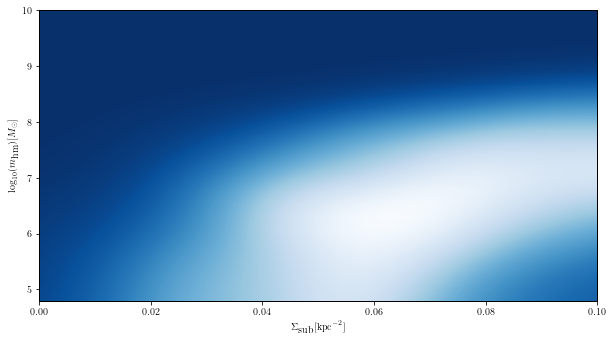

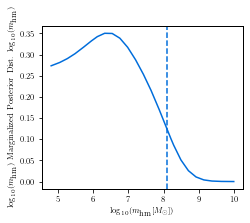

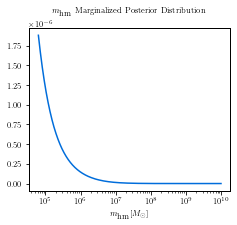

In [2]:
### Load the likelihood, which is provided as a 2D python function that has been pickled
f = sl.load_posterior(paper = "Gilman2020")
### Marginalize the likelihood to obtain the posterior distribution for log10(mhm)
log10_m_hm, p_log10_mhm = sl. marginalizing_over_sigma(f, samples=3000)
sl.plot_m_hm_posterior(log10_m_hm,p_log10_mhm)
### Transform the p(log10(mhm)) to p(mhm)
m_hm, p_m_hm = sl.mhm_log_to_linear(log10_m_hm,p_log10_mhm)


#### Test: Check that the 95 limit of p(log10mhm) and p(mhm) give the same number 

In [3]:
 
lower_95_log10mhm, upper_95_log10mhm, p = dist.norm_and_limit(log10_m_hm, p_log10_mhm )

Upper 95% upper limit on m is 8.087381230205034
Lower 95% lower limit on m is 4.980730121686948


In [4]:
lower_95_mhm, upper_95_mhm, p = dist.norm_and_limit(m_hm, p_m_hm  )

Upper 95% upper limit on m is 122287325.40259938
Lower 95% lower limit on m is 95659.99150000757


In [5]:
### taking the log of the lower 95% limit of m_hm
print(np.log10(upper_95_mhm))

8.087381446464235


In [6]:
## yep, they are the same.

#### Note: the value of the upper 95% limit for m_hm, 8.08, is slightly different from  the 7.8 in Gilman2020, because there they resample the likelihood and bin it in 20 bins. We chose to no resample and use the directly the kernel smoothed likelihood that was calculated from the multiplied likelihoods for each quasar

## Calculating Thermal Relic WDM

#### Make Fig. 3 from the paper 

Thermal relic WDM, for  Case I   include_baryons
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Thermal relic WDM, for  Case II   no_baryons
Upper 95% upper limit on m is 37.106684538073026
Lower 95% lower limit on m is 4.327764176252796


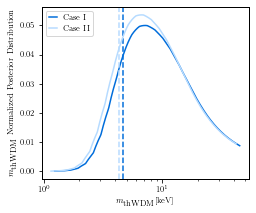

In [7]:
th.plot_thWDM(m_hm,p_m_hm)

## Sterile Neutrino PK and KTY cases

#### Make Fig 3 from the paper

m_thWDM = 0.75231 keV +/- 2.07798e-06 keV
0.75231161555793
m_thWDM = 1.28855 keV +/- 7.33383e-06 keV
1.2885473824205693
m_thWDM = 1.76977 keV +/- 1.52028e-05 keV
1.769773615257045
m_thWDM = 3.45254 keV +/- 6.60405e-05 keV
3.4525382849730097
m_thWDM = 6.01509 keV +/- 2.63693e-04 keV
6.015085651800808
m_thWDM = 6.34008 keV +/- 2.55072e-04 keV
6.34008091324865
m_thWDM = 11.10080 keV +/- 8.31023e-04 keV
11.100799853445245
m_thWDM = 19.43943 keV +/- 2.89752e-03 keV
19.439430533458737
m_thWDM = 2.64490 keV +/- 3.76554e-05 keV
2.644902055788822
m_thWDM = 4.58243 keV +/- 1.20776e-04 keV
4.5824346554450806
m_thWDM = 6.34480 keV +/- 2.65990e-04 keV
6.344799607676423
m_thWDM = 12.54727 keV +/- 1.23606e-03 keV
12.547265151499609
m_thWDM = 21.99173 keV +/- 3.55829e-03 keV
21.991729845027766


(array([ 1.,  2.,  3.,  7., 14.]),
 array([ 2.64490206,  4.58243466,  6.34479961, 12.54726515, 21.99172985]))

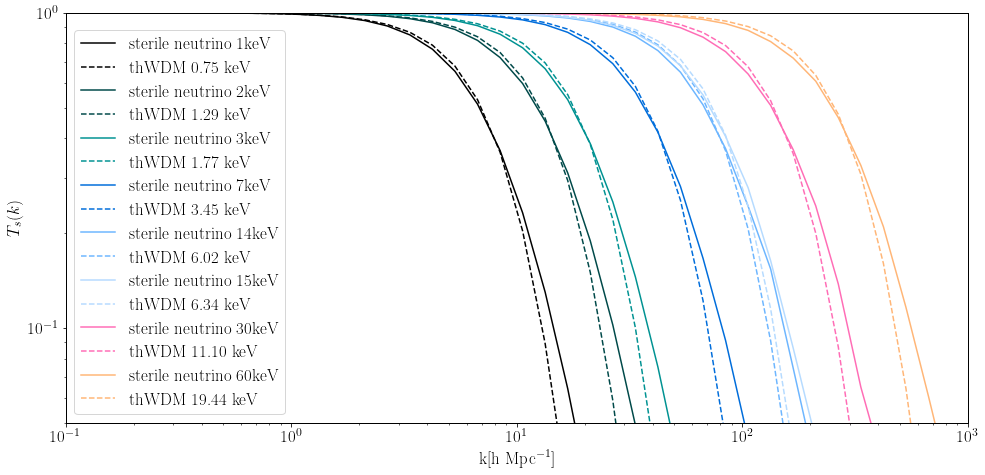

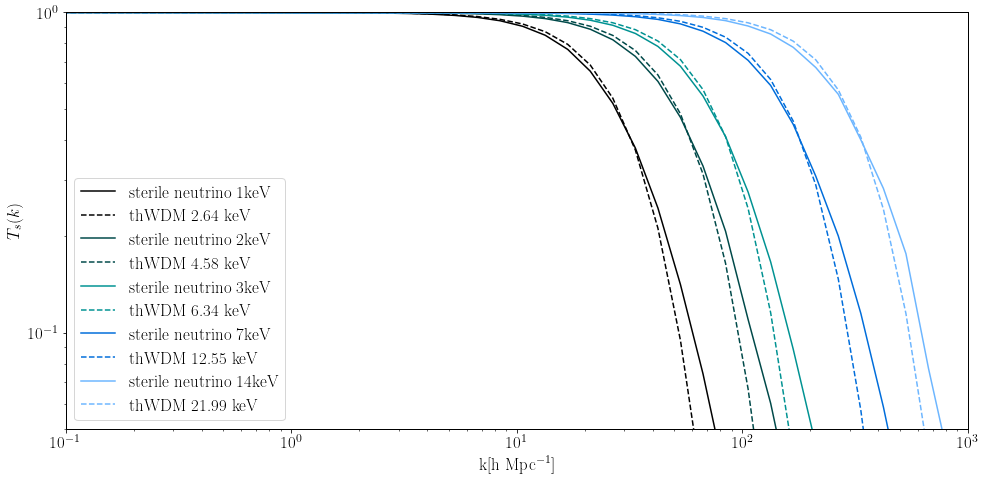

In [8]:
#### Kev 2022 February Transfer functions
t1 = transfer_functions.TransferFunctions(cosmo_constants_type="Planck2018", transfer_function_type = "PK",th_WDM_model_type="viel")
t1.fit_sn_with_WDM(paper_plot=False)
poly_dict_thWDM_to_sn, poly_dict_sn_to_thWDM =t1.fit_polynomials()

#### KTY Transfer functions
t2 = transfer_functions.TransferFunctions(cosmo_constants_type="Planck2018", transfer_function_type = "KTY",th_WDM_model_type="viel")
t2.fit_sn_with_WDM(paper_plot=False)


#### Make the the fits Table 1 from the paper


In [9]:
transfer_functions.make_table(t1,t2)

#### Make Figure 4 from the paper, the plot of m_sn vs m_thWDM

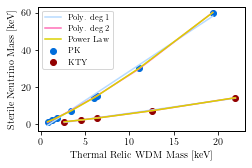

In [10]:
transfer_functions.plot_sn_vs_wdm_overlay(t1, t2, paper_plot=True)

In [11]:
#sn.plot_sn_posteriors(m_hm,p_m_hm,t1,t2)

### Dodelson Wilson

Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Upper 95% upper limit on m is 590.6908717941933
Lower 95% lower limit on m is 33.659591446083596
Upper 95% upper limit on m is 37.106684538073026
Lower 95% lower limit on m is 4.327764176252796
Upper 95% upper limit on m is 538.0229457176711
Lower 95% lower limit on m is 30.658392411699438


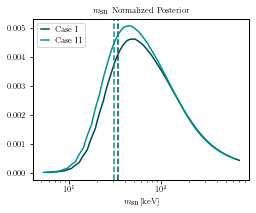

In [12]:
sn.calculate_DW(m_hm,p_m_hm)

Calculating  Case I   include_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 161.30411959313278
Lower 95% lower limit on m is 10.410128736374965
Calculating  Case II   no_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 37.106684538073026
Lower 95% lower limit on m is 4.327764176252796
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 145.7356206033853
Lower 95% lower limit on m is 9.573857737696063
Calculating  Case I   include_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 30.772593934105863
Lower 95% lower limit on m is 2.0587700006685936
Calculating  Case II   no_baryons
Calculating

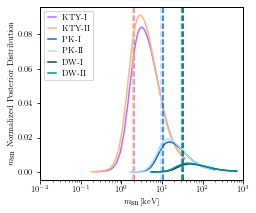

In [13]:


sn.plot_all_sn(m_hm,p_m_hm,t1,t2)

### Make Figure 5 from the paper

----------
PK
Calculating  Case I   include_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 161.30411959313278
Lower 95% lower limit on m is 10.410128736374965
Calculating  Case II   no_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 37.106684538073026
Lower 95% lower limit on m is 4.327764176252796
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 145.7356206033853
Lower 95% lower limit on m is 9.573857737696063
----------
KTY
Calculating  Case I   include_baryons
Calculating the thWDM posterior
Upper 95% upper limit on m is 39.79896227240268
Lower 95% lower limit on m is 4.641765367040939
Calculating the sn posterior
Calculate sn for degree  2
Upper 95% upper limit on m is 30.772593934105863
Lower 95% lower limit on m is 2.0587700006685936
Calculating  Cas

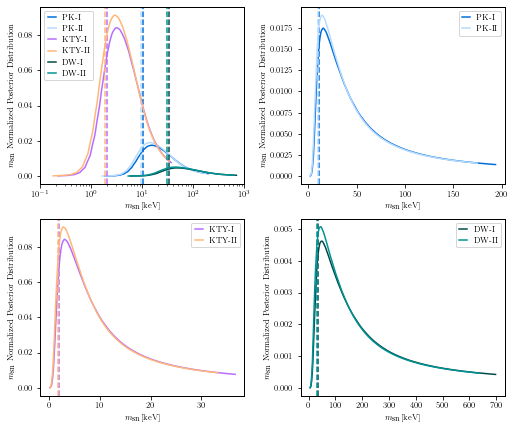

In [14]:

sn.plot_all_sn_panels(m_hm,p_m_hm,t1,t2)

In [ ]:
##from Vegetti et al 2018 https://ui.adsabs.harvard.edu/abs/2018MNRAS.481.3661V
#95% upper and lower limits for log(M_hm) M_sun: 9.16, 11.91 
#68%  upper and lower limits for log(M_hm) M_sun: 6.43, 12.01

## Lyman-alpha limit

In [15]:
#These are limits based on the lyman-alpha paper: 

### 3.3 keV constraint from Viel et al. (2013), 5.3 keV constraint from Iršič et al. (2017)
m_thWDM_lalpha_viel = 3.3 #keV
m_thWDM_lalpha_irsic = 5.3 #keV


In [16]:
### Limits on PK and KTY
def lyman_alpha_PK_and_KTY(degree=2):
    poly_dict_thWDM_to_snPK, poly_dict_sn_to_thWDM1 =t1.fit_polynomials()
    poly_dict_thWDM_to_snKTY, poly_dict_sn_to_thWDM1 =t2.fit_polynomials()
    m_snPK_v = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snPK, np.array([m_thWDM_lalpha_viel]), degree)
    m_snPK_i = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snPK, np.array([m_thWDM_lalpha_irsic]), degree)
    print( "PK SnDW Ly alpha: Viel", m_snPK_v,"keV, Irsic", m_snPK_i, "keV")
    m_snKTY_v = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snKTY, np.array([m_thWDM_lalpha_viel]), degree)
    m_snKTY_i = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snKTY, np.array([m_thWDM_lalpha_irsic]), degree)
    print( "KTY SnDW Ly alpha: Viel", m_snKTY_v,"keV, Irsic", m_snKTY_i, "keV")
    
        
lyman_alpha_PK_and_KTY(degree=2)

PK SnDW Ly alpha: Viel [6.89996021] keV, Irsic [12.19257194] keV
KTY SnDW Ly alpha: Viel [1.31509466] keV, Irsic [2.43306459] keV


In [17]:
### Limits on DW

def get_Omega_DM():
    H_0, Omega_Baryon, Omega_Matter, Omega_Lambda, Omega_Neutrinos, T_cmb, h = model_utils.cosmo_param_Planck_2018()
    Omega_DM = Omega_Matter-Omega_Baryon-Omega_Neutrinos
    return Omega_DM
def lyman_alpa_DW():
    Omega_DM = get_Omega_DM()
    msnDW_v = sn.m_thWDM_to_msnDW(m_thWDM_lalpha_viel, Omega_DM)
    msnDW_i = sn.m_thWDM_to_msnDW(m_thWDM_lalpha_irsic, Omega_DM)
    print("SnDW Ly alpha: Viel", msnDW_v,"keV, Irsic", msnDW_i, "keV")
    return msnDW_v, msnDW_i
lyman_alpa_DW()

SnDW Ly alpha: Viel 21.357471703410006 keV, Irsic 40.169745412075684 keV


(21.357471703410006, 40.169745412075684)

In [24]:
### Limits on nuMSM

def hm_from_thWDM():
    
    case_list = ["include_baryons","no_baryons" ]
    label_list= ["Case I","Case II"]
    m_sn_list = []
    p_sn_list = []
    sn_lower_limit_list = []
    
    for case_index in range(len(case_list)):
        case  = case_list[case_index]
        label=label_list[case_index]
        print("Calculating ",label," ", case)

        m_hmv = th.m_thWDM_to_m_hm(m_thWDM_lalpha_viel,case)
        m_hmi = th.m_thWDM_to_m_hm(m_thWDM_lalpha_irsic,case)
        print("Viel", np.log10(m_hmv))
        print("Irsic", np.log10(m_hmi))


In [25]:
hm_from_thWDM()

Calculating  Case I   include_baryons
Viel 8.580784747734
Irsic 7.895597521756739
Calculating  Case II   no_baryons
Viel 8.479487492336306
Irsic 7.794300266359044


## Constraints using Milky Way satellite analysis

In [18]:

def galaxy_constraints(degree=2):
    m_hm_G = 10**7.0
    
    poly_dict_thWDM_to_snPK, poly_dict_sn_to_thWDM1 =t1.fit_polynomials()
    poly_dict_thWDM_to_snKTY, poly_dict_sn_to_thWDM1 =t2.fit_polynomials()
    
    Omega_DM = get_Omega_DM()

    case_list = ["include_baryons","no_baryons" ]
    label_list= ["Case I","Case II"]
    for i in range(2):
        case= case_list[i]
        m_thWDM = th.m_hm_to_m_thWDM(m_hm_G,case)
        print("Case ",case )
        print("thWDM", m_thWDM)
        m_snPK = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snPK, np.array([m_thWDM]), degree)
        print( "PK SnDW galaxy: ", m_snPK, " keV")
        m_snKTY = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snKTY, np.array([m_thWDM]), degree)
        print( "KTY SnDW galaxy:", m_snKTY," keV")
        m_snDW = sn.m_thWDM_to_msnDW(m_thWDM, Omega_DM)
        print( "DW SnDW galaxy:", m_snDW," keV")
   


In [19]:
galaxy_constraints()

Case  include_baryons
thWDM 9.845189375021862
PK SnDW galaxy:  [25.5865034]  keV
KTY SnDW galaxy: [5.18769227]  keV
DW SnDW galaxy: 91.72689350033363  keV
Case  no_baryons
thWDM 9.17919250899277
PK SnDW galaxy:  [23.50529313]  keV
KTY SnDW galaxy: [4.76548361]  keV
DW SnDW galaxy: 83.54822428976925  keV
